Validation of Company_websites in Dataset

In [1]:
import concurrent.futures
from multiprocessing.dummy import Pool as ThreadPool
from concurrent.futures import ThreadPoolExecutor
import time
import pandas as pd
from bs4 import BeautifulSoup
import requests
from urllib.parse import urljoin

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36.',
# # "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:98.0) Gecko/20100101 Firefox/98.0",
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8",
    "Accept-Language": "en-US,en;q=0.5",
    "Accept-Encoding": "gzip, deflate",
    "Connection": "keep-alive",
    "Upgrade-Insecure-Requests": "1",
    "Sec-Fetch-Dest": "document",
    "Sec-Fetch-Mode": "navigate",
    "Sec-Fetch-Site": "none",
    "Sec-Fetch-User": "?1",
    "Cache-Control": "max-age=0",}

def validate(index, row):
    try:
        response = requests.get(row['company_website'], headers=headers , timeout=3)
        if response.elapsed.total_seconds() > 3:
            df.loc[index, 'invalid_pages'] = 'The response is taking too long'
        elif response.status_code <= 400 or response.status_code == "":
            df.loc[index, 'validated_link'] = row["company_website"]
        else:
            df.loc[index, 'invalid_pages']= response.status_code
    except:
      df.loc[index, 'invalid_pages'] = "invalid page"


df = pd.read_csv('c://users//phani//desktop//companies.csv').fillna("")
df['validated_link'] = ''
df['invalid_pages'] = ''
with concurrent.futures.ThreadPoolExecutor(max_workers= 25) as executor:
        executor.submit(validate, index, row)


df.to_csv('c://users//phani//desktop//bior_companies.csv', index=False, encoding='utf8')

In [6]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv("c://users//phani//desktop//bior_companies.csv", encoding='utf8')

# df = df.dropna().all
df_column = df['validated_errors']

# Calculate the frequency of each value in the column

df_freq = df_column.value_counts()

# Plot the histogram

df_freq.plot(kind='bar')

plt.show()

Top 25 terms in Dataset for further scraping of Career pages

In [14]:
import pandas as pd

company_website = pd.read_csv('c://users//phani//desktop//usable_companies.csv').fillna("")

website_list = company_website['valid_link2'].tolist()

split_website_list = [i.split('/')[-1] for i in website_list]

top_25 = sorted(set(split_website_list), key=split_website_list.count, reverse=True)[:24]

top_25 = [i for i in top_25 if i != '' and "." not in i]
top_25 = [i for i in top_25 if len(i)>4]
top_25 = [i.replace('-', ' ').replace('#', '') for i in top_25]

print(top_25)
fig = plt.figure()
fig.suptitle('Top 25 Words Without Punctuation and Numbers', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_xlabel('Words')
ax.set_ylabel('Frequency')

ax.barh(top_25, [split_website_list.count(i) for i in top_25], color = 'blue')

plt.show()



['careers', 'working', 'join us', 'work with us', 'work for us', 'join our team', 'job vacancies', 'search', 'Careers', 'job opportunities', 'vacancies', 'job search', 'early careers', 'careers', 'search jobs', 'join the team']


Scraping Career Pages

In [ ]:
# %pip install -U ipykernel
import concurrent.futures
from multiprocessing.dummy import Pool as ThreadPool
from concurrent.futures import ThreadPoolExecutor
import time
import pandas as pd
from bs4 import BeautifulSoup
import requests
from urllib.parse import urljoin

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36.',
# # "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:98.0) Gecko/20100101 Firefox/98.0",
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8",
    "Accept-Language": "en-US,en;q=0.5",
    "Accept-Encoding": "gzip, deflate",
    "Connection": "keep-alive",
    "Upgrade-Insecure-Requests": "1",
    "Sec-Fetch-Dest": "document",
    "Sec-Fetch-Mode": "navigate",
    "Sec-Fetch-Site": "none",
    "Sec-Fetch-User": "?1",
    "Cache-Control": "max-age=0",}

def scrape(index, row):
    try:
        response = requests.get(row['validated_link'], headers=headers , timeout=3)
        # if response.elapsed.total_seconds() > 3:
        #     print('The response is taking too long')
        # elif response.status_code <= 400 or response.status_code == "":
        html = BeautifulSoup(response.content, 'html.parser')
        for link in html.find_all('a'):
            for term in terms:
                if term in row['validated_link']:
                    df.loc[index, 'career_pages'] = row['validated_link']
                elif term in link.text.lower():

                    df.loc[index, 'career_pages'] = link['href'].replace('///','/')
                # else:
                #     df.loc[index, 'career_pages'] = row["validated_link"]
    
    except:
        pass


df = pd.read_csv('c://users//phani//desktop//bior_companies.csv', encoding='utf-8').fillna("")
terms = [ 'careers', 'career','work with us', 'work for us','vacancies','employment', 'join us', 'join the team',  'join our team', 'employment', 'recruitment', 'jobs' ]
df['career_pages'] = ''
# df['career_errors'] = ''
with concurrent.futures.ThreadPoolExecutor(max_workers= 25) as executor:
    for index, row in df.iterrows():
        executor.submit(scrape, index, row)

filter_terms =  ["javascript", "bit.ly", "mailto", "linkedin", "facebook","instagram"]
for url in df["career_pages"]:
    for x in filter_terms:
        if x in url: 
             url = ''
df.to_csv('c://users//phani//desktop//bior_companies2.csv', index=False, encoding='utf8')

Validating Careers pages

In [2]:
import concurrent.futures
from multiprocessing.dummy import Pool as ThreadPool
from concurrent.futures import ThreadPoolExecutor
import time
import pandas as pd
from bs4 import BeautifulSoup
import requests
from urllib.parse import urljoin

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36.',
# # "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:98.0) Gecko/20100101 Firefox/98.0",
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8",
    "Accept-Language": "en-US,en;q=0.5",
    "Accept-Encoding": "gzip, deflate",
    "Connection": "keep-alive",
    "Upgrade-Insecure-Requests": "1",
    "Sec-Fetch-Dest": "document",
    "Sec-Fetch-Mode": "navigate",
    "Sec-Fetch-Site": "none",
    "Sec-Fetch-User": "?1",
    "Cache-Control": "max-age=0",}

def validate(index, row):
    try:
        # if row['career_pages'] != "": 
        response = requests.get(row['career_pages'], headers=headers , timeout=3)
        if response.status_code <= 400:
            df.loc[index, 'validated_career_pages'] = row['career_pages']
            
               
    except:
        if row['career_pages'] != "":
            
            df.loc[index, 'validated_career_pages'] = df.loc[index, 'company_website'] + df.loc[index,'career_pages']
            print(df.loc[index, 'validated_career_pages']) 


df = pd.read_csv('c://users//phani//desktop//bior_companies2.csv').fillna("")
df['validated_career_pages'] = ''
with concurrent.futures.ThreadPoolExecutor(max_workers= 25) as executor:
    for index, row in df.iterrows():
        executor.submit(validate, index, row)


df.to_csv('c://users//phani//desktop//bior_companies3.csv', index=False, encoding='utf8')

https://www.15marketing.co.uk//join-us
http://www.1-fix.com/careers
http://www.fivee.co.uk/job
http://www.8x8.com/careers
http://www.amphillip.co.uk/recruitment/
https://www.abbeyliftcare.co.uk//careers
https://www.abcellera.com//careers
http://www.abuscranes.co.uk/careers
http://www.acorngroup.co.uk/about-us/careers
https://acres.engineering/contact-us
http://www.actionpf.org/about/jobs
http://www.actionplas.com/vacancies
http://www.activeelectrical.comelectrician-henley/henley-electrical-contractors.html
http://www.active-pathways.com/join-the-team/latest-jobs/
https://activesecurity.com//cctv-installer_slough.html
https://addisonhunt.co.uk/mailto:careers@addisonhunt.co.uk
http://www.adeptpwt.co.uk/job-opportunities-adept
https://www.adoptionuk.org//jobs-page
https://www.advance.fm/#
http://www.adwail.com/recruitment/
http://www.aecom.com/careers
http://www.aeromark.co.uk/solutions/insight-analytics/
https://www.afhwm.co.uk//careers
https://www.ageuk.org.uk/bromleyandgreenwich//broml

Top 50 terms career pages 

In [18]:
import pandas as pd

company_website = pd.read_csv('c://users//phani//desktop//bior_companies3.csv').fillna("")

website_list = company_website['validated_career_pages'].tolist()

split_website_list = [i.split('/')[-1] for i in website_list]

top_50 = sorted(set(split_website_list), key=split_website_list.count, reverse=True)[:50]

top_50 = [i for i in top_50 if i != '' and "." not in i]
top_50 = [i for i in top_50 if len(i)>4]
top_50 = [i.replace('-', ' ').replace('#', ' ') for i in top_50]

print(top_50)
fig = plt.figure()
fig.suptitle('Top 50 Words Without Punctuation and Numbers', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_xlabel('Words')
ax.set_ylabel('Frequency')

ax.barh(top_50, [split_website_list.count(i) for i in top_50], color = 'blue')

plt.show()


['careers', 'recruitment', 'vacancies', 'working', 'join us', 'work with us', 'job vacancies', 'current vacancies', 'work for us', 'join our team', 'career opportunities', 'Careers', 'career', ' careers', '?locale=en_GB', 'search', 'jobs and careers', 'work us', 'employment opportunities', ' vacancies', 'Vacancies', 'jobs and volunteering', 'early careers', 'staff vacancies', 'employment', 'all vacancies', 'careers_in_childrens_early_intervention_and_social_work', 'jobs boost as x cel group secures major new contract', 'hiring']


Skipping exising job list pages and further scraping job list pages

In [ ]:
import concurrent.futures
from multiprocessing.dummy import Pool as ThreadPool
from concurrent.futures import ThreadPoolExecutor
import time
import pandas as pd
from bs4 import BeautifulSoup
import requests
from urllib.parse import urljoin

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36.',
# # "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:98.0) Gecko/20100101 Firefox/98.0",
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8",
#     "Accept-Language": "en-US,en;q=0.5",
    "Accept-Encoding": "gzip, deflate",
    "Connection": "keep-alive",
    "Upgrade-Insecure-Requests": "1",
    "Sec-Fetch-Dest": "document",
    "Sec-Fetch-Mode": "navigate",
    "Sec-Fetch-Site": "none",
    "Sec-Fetch-User": "?1",
    "Cache-Control": "max-age=0",}

def scrape(index, row):
    try:
        response = requests.get(row['validated_career_pages'], headers=headers , timeout=3)
        # if response.elapsed.total_seconds() > 3:
        #     print('The response is taking too long')
        # elif response.status_code <= 400 or response.status_code == "":
        html = BeautifulSoup(response.content, 'html.parser')
        for link in html.find_all('a'):
            for term in terms:
                if term in row['validated_career_pages']:
                    df.loc[index, 'job_pages'] = row['validated_career_pages']
                elif term in link.text.lower():

                    df.loc[index, 'job_pages'] = link['href']
                # else:
                #     df.loc[index, 'career_pages'] = row["validated_link"]
    
    except:
        pass


df = pd.read_csv('c://users//phani//desktop//bior_companies3.csv', encoding='utf-8').fillna("")
terms = ['jobs',  'job vacancies', 'vancancies', 'opportunities', 'search jobs', 'search vacancies', 'current', 'find jobs', 'find all',]
df['job_pages'] = ''
with concurrent.futures.ThreadPoolExecutor(max_workers= 25) as executor:
    for index, row in df.iterrows():
        executor.submit(scrape, index, row)

filter_terms =  ["javascript", "bit.ly", "mailto", "linkedin", "facebook","instagram", "void"]
for url in df["job_pages"]:
    for x in filter_terms:
        if x in url: 
             url = ''
df.to_csv('c://users//phani//desktop//bior_companies4.csv', index=False, encoding='utf8')

Validating Job list pages 

In [5]:
import concurrent.futures
from multiprocessing.dummy import Pool as ThreadPool
from concurrent.futures import ThreadPoolExecutor
import time
import pandas as pd
from bs4 import BeautifulSoup
import requests
from urllib.parse import urljoin

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36.',
# # "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:98.0) Gecko/20100101 Firefox/98.0",
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8",
#     "Accept-Language": "en-US,en;q=0.5",
    "Accept-Encoding": "gzip, deflate",
    "Connection": "keep-alive",
    "Upgrade-Insecure-Requests": "1",
    "Sec-Fetch-Dest": "document",
    "Sec-Fetch-Mode": "navigate",
    "Sec-Fetch-Site": "none",
    "Sec-Fetch-User": "?1",
    "Cache-Control": "max-age=0",}

def scrape(index, row):
    try:
        # if row['career_pages'] != "": 
        response = requests.get(row['job_pages'], headers=headers , timeout=3)
        if response.status_code <= 400:
            df.loc[index, 'validated_job_pages'] = row['job_pages']
            
               
    except:
        if row['job_pages'] != "":
            
            df.loc[index, 'validated_job_pages'] = df.loc[index, 'company_website'] + df.loc[index,'job_pages']
            print(df.loc[index, 'validated_job_pages']) 


df = pd.read_csv('c://users//phani//desktop//bior_companies4.csv').fillna("")
df['validated_job_pages'] = ''
with concurrent.futures.ThreadPoolExecutor(max_workers= 25) as executor:
    for index, row in df.iterrows():
        executor.submit(scrape, index, row)


df.to_csv('c://users//phani//desktop//bior_companies5.csv', index=False, encoding='utf8')

http://www.fivee.co.uk/./
https://www.5grecruitment.co.uk/jobs/
http://www.5grecruitment.co.uk/jobs/
http://www.8x8.com/#open-positions
https://www.abagri.comjavascript:WebForm_DoPostBackWithOptions(new WebForm_PostBackOptions("ctl00$ContentContainer$TopSearch$btnSearch", "", true, "", "", false, true))
https://www.abdynamics.com/en/#_current-vacancies
https://abingdon-witney.ac.uk/#vacancies
http://www.accenture.com/ukcareers/gb-en/careers/explore-careers/area-of-interest/cybersecurity-careers
https://www.accessstorage.com/work-for-usmailto:jobs@accessstorage.com?subject=eMail%20Jobs%20at%20Access
http://www.acorngroup.co.uk/about-us/careers/equality-diversity-policy
https://activesecurity.com//cctv-installer_slough.html
https://adeptcsce.com/mailto:jobs@adepcsce.com
http://www.advanceuk.org/employment/jobs
http://www.advinia.co.uk/job/{{jobs.AdvertId}}
http://www.airproducts.co.uk#/
https://www.ajbell.co.uk/careers/careers/vacancies
https://www.ajs.co.uk/about-us/#careeropportunities

Combing existing job list pages and scraped job list pages

In [8]:
def scrape(index, row):
    try:
        # if row['career_pages'] != "": 
        response = requests.get(row['validated_job_pages'], headers=headers , timeout=3)
        if response.status_code <= 400:
            df.loc[index, 'final_pages'] = row['validated_job_pages']
            
               
    except:
        if row['validated_job_pages'] == "":
            
            df.loc[index, 'final_pages'] = df.loc[index, 'validated_career_pages'] 
            # print(df.loc[index, 'validated_job_pages']) 


df = pd.read_csv('c://users//phani//desktop//bior_companies5.csv').fillna("")
df['final_pages'] = ''
with concurrent.futures.ThreadPoolExecutor(max_workers= 25) as executor:
    for index, row in df.iterrows():
        executor.submit(scrape, index, row)


df.to_csv('c://users//phani//desktop//bior_companies6.csv', index=False, encoding='utf8')

Validation final pages with class count

In [ ]:
def find_similar_class_tags(html):
  try:
    soup = BeautifulSoup(html, 'html.parser')
    classes = {}
    for tag in soup.find_all():
      if 'class' in tag.attrs:
        class_list = tag.attrs['class']
    for c in class_list:
      if c not in classes:
        classes[c] = 1
      else:
        classes[c] += 1
        return classes
  except:
    print('none')

if count(classes) > 6:
        df.loc[index, 'final_url'] = classes

find_similar_class_tags(html)    
df.to_csv('c://users//phani//desktop//bior_companies6.csv', index=False, mode='a',encoding='utf8')

Plot to see the overall scraped pages count

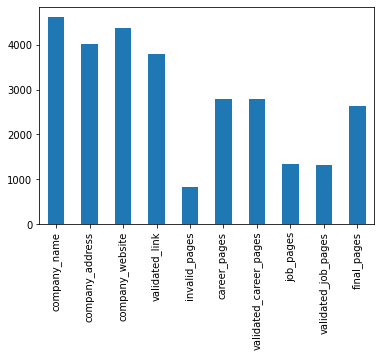

In [59]:
# %pip install matplotlib

import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv("c://users//phani//desktop//bior_companies6.csv", encoding='utf8')

# df = df.dropna().all
plt.figure()

df.count(axis=0).plot(kind="bar")

plt.show()



Scraping text data, tags from job list pages for TextClassification





Skip to content
















 
 020 3744 7298
 


 
 5 STAR CUSTOMER REVIEWS 


 SAME DAY APPOINTMENTS


Boiler Quote






























Home


Services


Join the Team


Contact


Payments


Boiler Quote
























Menu Toggle












Home


Services


Join the Team


Contact


Payments


Boiler Quote
































 


Contact Our Team
Vacancies
Join Our Team
Are you looking for work in the London Area ?

Are you a Heating Engineer or Plumber ?

Join our team of experts servicing London.


 










Gas Engineer


Location:

London


Salary/Rate

£38000 - £50000/annum 


We would like to offer:


Permanent Position

Company Van

Uniform

Holiday Pay

Fuel Card 

Parking Paid 

Overtime 





We are offering a permanent position within our fast growing home emergency company. Our ideal candidate has a full UK driving license, a full ACS certificate (boilers, cookers and fires) and can do Plumbing aswell as Gas but not essential. We
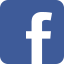
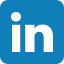

In [1]:
import concurrent.futures
from multiprocessing.dummy import Pool as ThreadPool
from concurrent.futures import ThreadPoolExecutor
import time
import pandas as pd
from bs4 import BeautifulSoup
import requests
from urllib.parse import urljoin

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36.',
# # "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:98.0) Gecko/20100101 Firefox/98.0",
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8",
    "Accept-Language": "en-US,en;q=0.5",
    "Accept-Encoding": "gzip, deflate",
    "Connection": "keep-alive",
    "Upgrade-Insecure-Requests": "1",
    "Sec-Fetch-Dest": "document",
    "Sec-Fetch-Mode": "navigate",
    "Sec-Fetch-Site": "none",
    "Sec-Fetch-User": "?1",
    "Cache-Control": "max-age=0",}

def scrape(index, row):
    try:
        # if row['career_pages'] != "": 
        response = requests.get(row['final_pages'], headers=headers , timeout=3)
        if response.status_code <= 400:
            soup = BeautifulSoup(response.content, "html.parser")
            body = soup.find('body')

            for tag in body.find_all(text=True):
                data = (str(tag))
                # data = [x.replace('\n', '') for x in data]
                print(data)

                df.loc[index, 'data'] = " ".join(data.split()).replace('\n', '').replace('\t','')
            
               
    except:
        pass
    # if 'javascript' in (str(visible_text2)).text.lower():
        #     df.loc['data_error'] = "javascript"
            



df = pd.read_csv('c://users//phani//desktop//bior_companies6.csv').fillna("")
df['data'] = ''
df['data_error'] = ''
with concurrent.futures.ThreadPoolExecutor(max_workers= 25) as executor:
    for index, row in df.iterrows():
        executor.submit(scrape, index, row)


# df.to_csv('c://users//phani//desktop//bior_companies7.csv', index=False, encoding='utf8')